   # Data Communication: Digital Signal analysis


 ## Assignment 1
 

### Q.1 )Generate a sine wave of Specific Frequency . Construct a square wave using multiple square waves

To generate the required plots We first create the required environment by using the matplotlib  and numpy libraries in python

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math



In [11]:
%matplotlib inline

In [12]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['figure.dpi'] = 150


In [13]:
from ipywidgets import interact,interactive,fixed,interact_manual
import ipywidgets as widgets


The function coded below Takes input the frequency of the sine wave using the interactive slider widget.


A square wave consists of multiple sine waves superposed on one another .
The Individual sine waves can be determined using the fourier analysis.
in general a simple square wave is given by the following series.


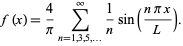

from the terms slider we can adjust the number of **terms**  that we add in order to create the square wave.



The wave is somewhat distorted when the number of terms is low and becomes more and more squared as the number of terms added increases.


the frequency taken here is is MHz and time in microseconds


In [14]:


def signal(terms,frequency):
    N = terms
    
    
    f = frequency
   
        
          
    
    f = 1000000 * float(frequency)
        
      
    
    t = np.arange(0, 0.000005 , 0.000000001)

    terms = np.sin(2*math.pi*f*t)

    for i in range(1, N + 1):
        terms += (1 / (2 * i + 1)) * np.sin((2 * i + 1) * 2*math.pi*f*t)
    
    plt.plot(t,(4 / math.pi) * terms)
    
interact(signal,terms = widgets.IntSlider(min=-0, max=25, step=1, value=0) ,frequency =(1,4,0.1))




    
    

interactive(children=(IntSlider(value=0, description='terms', max=25), FloatSlider(value=2.0, description='fre…

<function __main__.signal(terms, frequency)>

## Assignment 2

### Q.2 )Take a bit sequence and generate a digital signal from the sequence
### Plot it's NRZ-I and NRZ-L  signals .
### Add a random noise to the above signal and plot the noisy signal
### identify the threshold for detection of bit signal back 


The code below takes in input the bit sequence in '0' and '1'  and also the noise Level

##### NRZ-L signal 

In NRZ-L scheme we assign a low signal level to '1' and high signal level to '0'.

The NRZ-L signal for the entered bit sequence is plotted by taking -1v for '1' and +1v for '0'.

increasing the noise level distorts the signal and after a threshold it is not possible to obtain back the bit sequence.


In [15]:
def NRZ_L(bit_sequence,noise):
    if (bit_sequence == ''):
        bit_sequence = '0'
    
        

    high_bit = np.ones((10), dtype=int)
    low_bit = np.full((10), -1, dtype=int)
    
    l = len(bit_sequence)

    t = np.arange(0, 1, 0.01)

    if (bit_sequence[0] == '1'):
        y1 = low_bit
    else:
        y1 = high_bit

    for i in range(1, 10):
        if (bit_sequence[i % l] == '1'):
            y1 = np.concatenate((y1, low_bit))
        else:
            y1 = np.concatenate((y1, high_bit))
    
    plt.plot(t,y1 + np.random.normal( 0,0.1*noise,100))
    

interact(NRZ_L,bit_sequence = '0101',noise = widgets.IntSlider(min=-0, max=10, step=1, value=0)) 



interactive(children=(Text(value='0101', description='bit_sequence'), IntSlider(value=0, description='noise', …

<function __main__.NRZ_L(bit_sequence, noise)>

##### NRZ-I signal

In NRZ-I scheme we invert the signal level as soon as we encounter a '1' 
The signal continues to remain the same in case of '0' bit.
The NRZ-I signal for the given bit sequence is plotted below.


In [16]:
def NRZ_I(bit_sequence,noise):
    
    
    high_bit = np.ones((10), dtype=int)
    low_bit = np.full((10), -1, dtype=int)
    flag = False
    l = len(bit_sequence)

    t = np.arange(0, 1, 0.01)
    if (bit_sequence[0] == '1'):
        
        y2 = high_bit
        flag = True

   


    else:
        y2 = low_bit

    for i in range(1, 10):
        if (bit_sequence[i % l] == '1'):
            if (flag):
                y2 = np.concatenate((y2, low_bit))
                flag = False

            else:
                y2 = np.concatenate((y2, high_bit))
                flag = True



        else:
            if (flag):
                y2 = np.concatenate((y2, high_bit))
            else:
                y2 = np.concatenate((y2, low_bit))
                
                
    plt.plot(t,y2+ np.random.normal( 0,0.1*noise,100))

interact(NRZ_L,bit_sequence = '0101',noise = widgets.IntSlider(min=-0, max=10, step=1, value=0))    


interactive(children=(Text(value='0101', description='bit_sequence'), IntSlider(value=0, description='noise', …

<function __main__.NRZ_L(bit_sequence, noise)>